In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
import pandas as pd

import time

from math import *

In [2]:
dfnh = pd.read_table("data/fnh.dat", header=None, sep='\s+')
fnh=dfnh.as_matrix(columns=dfnh.columns[2:]).T[0]
dfsh = pd.read_table("data/fsh.dat", header=None, sep='\s+')
fsh=dfsh.as_matrix(columns=dfsh.columns[2:]).T[0]
t1=dfnh.as_matrix(columns=dfnh.columns[0:]).T[0]
t2=dfsh.as_matrix(columns=dfsh.columns[0:]).T[0]

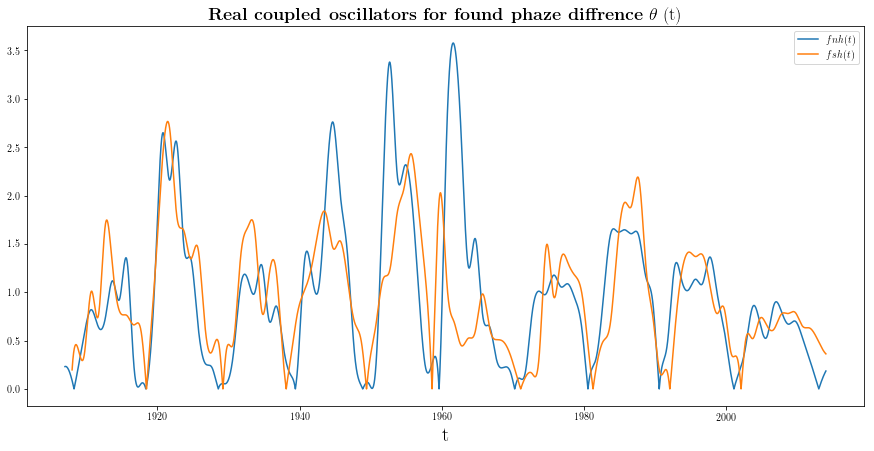

In [3]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(15, 7))
plt.plot(t1, fnh, label='$fnh(t)$')
plt.plot(t2, fsh, label='$fsh(t)$')
plt.legend()
plt.xlabel(r't', fontsize=20)
plt.title(r'\textbf{Real coupled oscillators for found phaze diffrence} $\theta$ (t)', fontsize=18)
plt.show()

In [4]:
t=t2
fnh=fnh[366:]

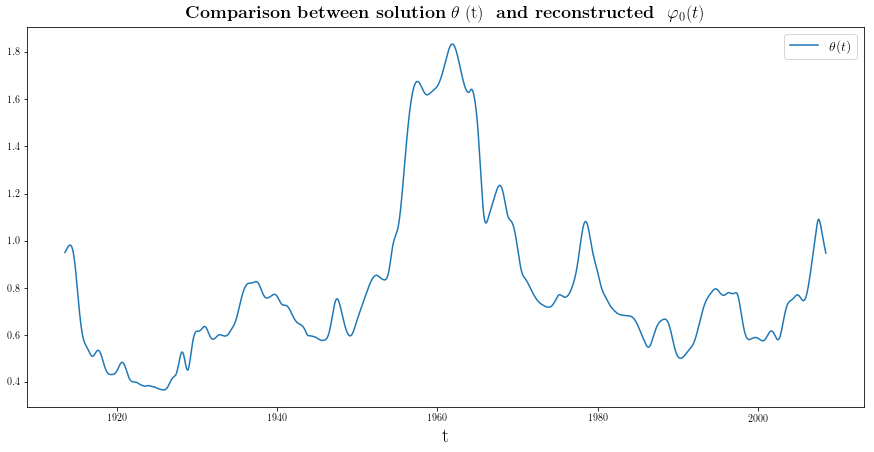

In [5]:
N_grid=t.shape[0]
p=365*11+2
h=t[1]-t[0]

dw=0.2

st=int(p/2)
fn=N_grid-1-st

C_0=[0]*N_grid

for i in range(N_grid):
    if (i-p/2>=0) and (i+p/2<=N_grid):
        C_0[i]=np.corrcoef(fnh[i-int(p/2):i+int(p/2)], fsh[i-int(p/2):i+int(p/2)])[0][1]
    else:
        C_0[i]=nan
        
theta=np.arccos(C_0)
        
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(15, 7))
plt.plot(t, theta, '-')
plt.legend([r'$\theta(t)$', r'$\varphi_0(t)$'], fontsize=14)
plt.xlabel(r't', fontsize=20)
plt.title(r'\textbf{Comparison between solution} $\theta$ (t) \textbf{ and reconstructed } $\varphi_0(t)$', fontsize=18)
plt.show()

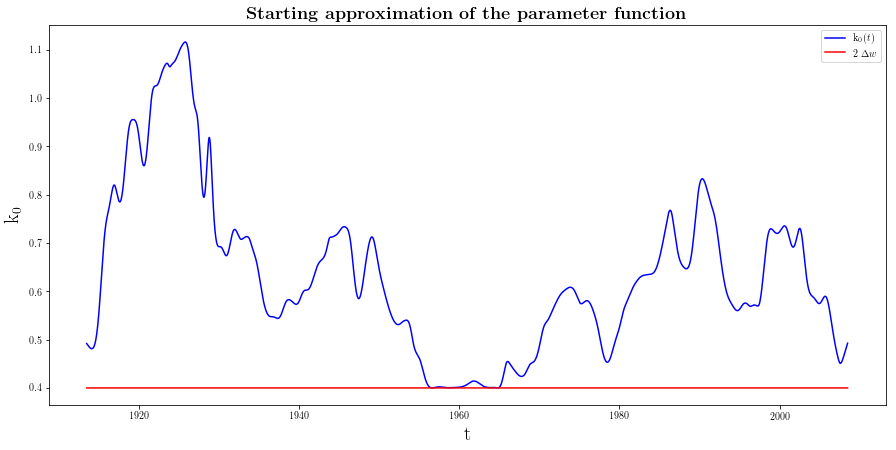

In [6]:
theta=theta[st+1:fn-1]
t=t[st+1:fn-1]

N_grid=t.shape[0]

dtheta=np.divide(np.diff(theta), np.diff(t))
dtheta=np.append(dtheta[0], dtheta)
k0=np.divide(2*dw, np.sin(theta))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(15, 7))
#plt.ylim((min(k_0)-0.05, max(k_0)))
plt.plot(t, k0, 'b')
plt.plot(t, [2*dw]*(N_grid), 'r')
#plt.plot(t, [(2*dw+sigma*move)]*(N_grid+wait_time), 'k--')
#plt.plot((wait_time/p, wait_time/p), (min(k0_t)-0.05, max(k0_t)), 'g-')
plt.xlabel(r't', fontsize=20)
plt.ylabel(r'k_0', fontsize=20)
plt.title(r'\textbf{Starting approximation of the parameter function}', fontsize=18)
plt.legend(['k_0(t)', '2 \Delta w'])
#plt.savefig('k0_try.eps', format='eps', dpi=1000)
plt.show()

In [7]:
import statsmodels.api as sm

/usr/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [16]:
model = sm.tsa.ARMA(k0, (1, 0)) 
results = model.fit(start_params=[0.9, .1]) 
results.predict()

array([ 3.17802915,  0.49188635,  0.49182069, ...,  0.49209197,
        0.49224248,  0.49239296])

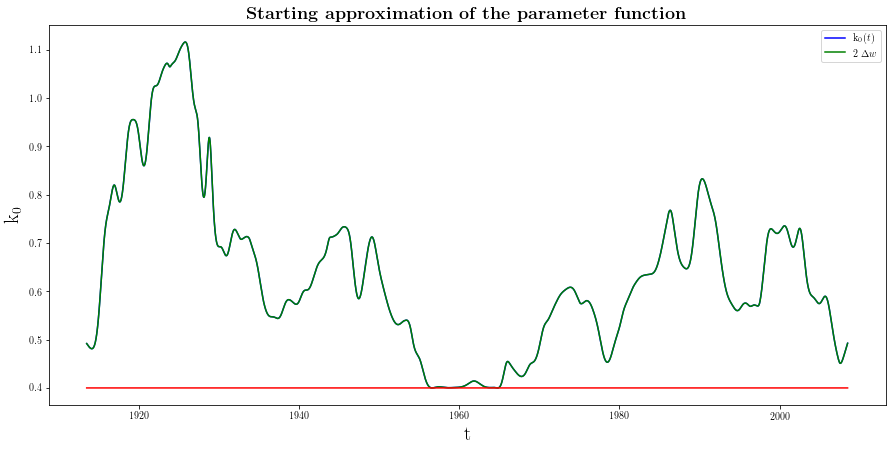

In [17]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(15, 7))
#plt.ylim((min(k_0)-0.05, max(k_0)))
plt.plot(t, k0, 'b')
plt.plot(t[1:], results.predict()[1:], 'g')
plt.plot(t, [2*dw]*(N_grid), 'r')
#plt.plot(t, [(2*dw+sigma*move)]*(N_grid+wait_time), 'k--')
#plt.plot((wait_time/p, wait_time/p), (min(k0_t)-0.05, max(k0_t)), 'g-')
plt.xlabel(r't', fontsize=20)
plt.ylabel(r'k_0', fontsize=20)
plt.title(r'\textbf{Starting approximation of the parameter function}', fontsize=18)
plt.legend(['k_0(t)', '2 \Delta w'])
#plt.savefig('k0_try.eps', format='eps', dpi=1000)
plt.show()

In [18]:
results.arparams

array([ 1.])

In [19]:
print(results.params)

[ 3.17802915  1.        ]


In [20]:
results.summary()

/usr/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
/usr/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                34698
Model:                     ARMA(1, 0)   Log Likelihood              246380.658
Method:                       css-mle   S.D. of innovations              0.000
Date:                Fri, 17 Nov 2017   AIC                        -492755.315
Time:                        18:08:52   BIC                        -492729.952
Sample:                             0   HQIC                       -492747.233
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1780        nan        nan        nan         nan         nan
ar.L1.y        1.0000        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [13]:
alpha=results.params[1]
c=results.params[0]

In [14]:
int(1/(1-alpha))

25661536338293

In [15]:
a_s=[]
c_s=[]
for i in range(89):
    model1 = sm.tsa.ARMA(k0[365*1*i:365*1*(i+1)], (1, 0)) 
    print(i)
    results = model1.fit(start_params=[1, .1]) 
    alpha=results.params[1]
    c=results.params[0]
    a_s.append(alpha)
    c_s.append(c)
    print(alpha, c)

0
0.999670521277 0.490429404467
1
0.999982860412 0.579204449679
2


/usr/lib/python3.6/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:649: RuntimeWarning: divide by zero encountered in true_divide
  R_mat, T_mat)
/usr/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:584: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
/usr/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:585: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/usr/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:585: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
/usr/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:586: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/
/usr/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:587: RuntimeWarning: o

0.999999991126 0.276563190128
3
0.99965029969 0.79095771688
4
0.999977362676 0.842921039015
5
0.999967338793 0.926603096727
6
0.999981954688 0.909705921541
7
0.999976874407 0.924806426563
8
0.999998987543 1.14612128946
9
0.999983132899 1.05250982869
10
0.999738339005 1.07399060462
11
0.99998443855 1.09381721258
12
0.999963069271 1.08240482237
13
0.999999999991 0.396158852046
14
0.999887500153 0.889705456059
15
0.999928423824 0.79384918215
16
0.999964608964 0.708910042861
17
0.999891867275 0.695445546471
18
0.999788693003 0.710250870314
19
0.999999990015 0.714299459287
20
0.999981383658 0.694044082369
21
0.999984347944 0.630635257872
22
0.999978526787 0.566987355742
23
0.999953835971 0.546043792969
24
0.999983404861 0.562605180177
25
0.999952083554 0.577450534601
26
0.999975994724 0.58586221555
27
0.999975380891 0.60484128302
28
0.999984379677 0.635282250766
29
0.999980528123 0.673511381182
30
0.999965749369 0.701919384021
31
0.999983327158 0.724024642771
32
0.99996604597 0.715827664972

/usr/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0.999953331868 0.400712783147
46
0.999979247537 0.401933480184
47
0.99998415709 0.407600633529
48
0.999869605891 0.411080377713
49
0.999982958859 0.405532554042
50
0.999891546139 0.400970757301
51
0.999962237706 0.410828324541
52
0.999942299885 0.43409795717
53
0.999984547446 0.436298844882
54
0.999953512138 0.43121812896
55
0.999981126266 0.446930346243
56
0.999983746732 0.488927352443
57
0.999983402836 0.537064833072
58
0.999984749392 0.570924437384
59
0.999983568812 0.597072108714
60
0.999917266764 0.602676246519
61
0.999975198826 0.587587272394
62
0.999815330361 0.573895864634
63
0.999983933236 0.542692651669
64
0.999981932542 0.48339269667
65
0.999981108203 0.474276679353
66
0.999984567112 0.525594411016
67
0.999984501496 0.577459236373
68
0.999984110002 0.612987178547
69
0.999978851972 0.6307042398
70
0.999971851095 0.638414893768
71
0.999983667425 0.672537329569
72
0.999979780586 0.734483511631
73
0.999984145162 0.7181736333
74
0.999976390751 0.658616488717
75
0.999979779423 0.6

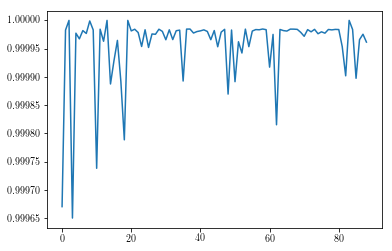

In [21]:
plt.plot(a_s)
plt.show()

In [22]:
max(a_s)

0.99999999999123057

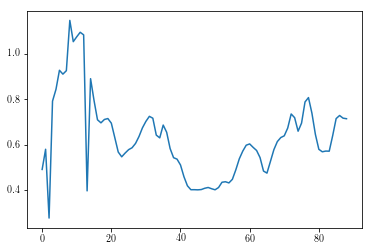

In [23]:
plt.plot(c_s)
plt.show()

In [24]:
int(1/(1-np.mean(a_s)))

22899

In [25]:
np.mean(k0)

0.63532550905551033

In [26]:
c

0.71354390701582937

In [27]:
alpha

0.99996158352069453

In [28]:
s=np.std(k0)*np.sqrt(1-alpha*alpha)

In [29]:
(c-2*dw)/s

212.80450394143534

/usr/lib/python3.6/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:649: RuntimeWarning: divide by zero encountered in true_divide
  R_mat, T_mat)
/usr/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:584: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
/usr/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:585: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
/usr/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:585: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
/usr/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:586: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/
/usr/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:587: RuntimeWarning: o

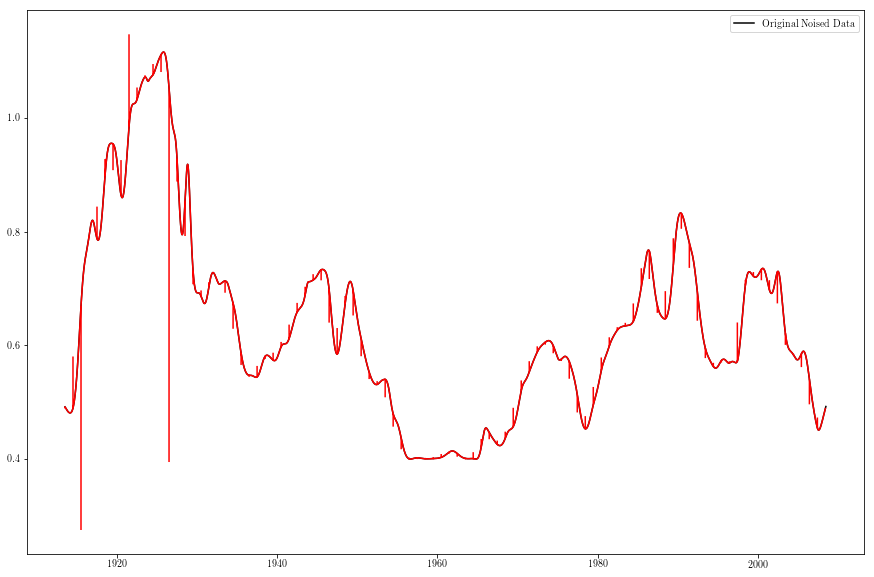

In [33]:
a_s=[]
c_s=[]

plt.figure(figsize=(15,10))
plt.plot(t, k0, 'k-', label="Original Noised Data")
for i in range(95):
    model1 = sm.tsa.ARMA(k0[365*1*i:365*1*(i+1)], (1, 0)) 
    results = model1.fit(start_params=[1, .1]) 
    plt.plot(t[365*1*i:365*1*(i+1)], results.predict(), 'r-')
    alpha=results.params[1]
    c=results.params[0]
    a_s.append(alpha)
    c_s.append(c)
plt.legend()
plt.show()